In [1]:
import sympy as sy
import sympy.physics.mechanics as me

# 二重振り子の運動方程式を導出

In [187]:
N = me.ReferenceFrame('N')
t = sy.symbols('t')

In [188]:
theta1, theta2 = me.dynamicsymbols("theta1 theta2")
qs = sy.Matrix([theta1, theta2])

In [189]:
l1, l2 = sy.symbols("l1 l2")

In [190]:
Po1 = me.Point("Po1")
m1 = sy.symbols("m1")
Pa1 = me.Particle("Pa1", Po1, m1)

In [191]:
x1 = l1*sy.sin(theta1)
vx1 = sy.diff(x1, t)
y1 = l1*sy.cos(theta1)
vy1 = sy.diff(y1, t)
Po1.set_vel(N, vx1*N.x+vy1*N.y)

In [192]:
Po2 = me.Point("Po2")
m2 = sy.symbols("m2")
Pa2 = me.Particle("Pa2", Po2, m2)

In [193]:
x2 = x1+l2*sy.sin(theta2)
vx2 = sy.diff(x2, t)
y2 = y1+l2*sy.cos(theta2)
vy2 = sy.diff(y2, t)
Po2.set_vel(N, vx2*N.x+vy2*N.y)

In [194]:
L = me.Lagrangian(N, Pa1,Pa2)

In [195]:
g = sy.symbols('g')
forcelist = [(Po1, m1*g*N.y),(Po2, m2*g*N.y)]

In [196]:
LM = me.LagrangesMethod(L, qs=qs, forcelist=forcelist, frame=N)

In [197]:
eom = sy.simplify(LM.form_lagranges_equations())
eom

Matrix([
[l1*(g*m1*sin(theta1(t)) + g*m2*sin(theta1(t)) + l1*m1*Derivative(theta1(t), (t, 2)) + l1*m2*Derivative(theta1(t), (t, 2)) + l2*m2*sin(theta1(t) - theta2(t))*Derivative(theta2(t), t)**2 + l2*m2*cos(theta1(t) - theta2(t))*Derivative(theta2(t), (t, 2)))],
[                                                                     l2*m2*(g*sin(theta2(t)) - l1*sin(theta1(t) - theta2(t))*Derivative(theta1(t), t)**2 + l1*cos(theta1(t) - theta2(t))*Derivative(theta1(t), (t, 2)) + l2*Derivative(theta2(t), (t, 2)))]])

In [198]:
# 状態方程式
f = sy.simplify(LM.rhs())
f

Matrix([
[                                                                                                                                                                                                                                                             Derivative(theta1(t), t)],
[                                                                                                                                                                                                                                                             Derivative(theta2(t), t)],
[          -(2*g*m1*sin(theta1(t)) + g*m2*sin(theta1(t) - 2*theta2(t)) + g*m2*sin(theta1(t)) + l1*m2*sin(2*theta1(t) - 2*theta2(t))*Derivative(theta1(t), t)**2 + 2*l2*m2*sin(theta1(t) - theta2(t))*Derivative(theta2(t), t)**2)/(l1*(2*m1 - m2*cos(2*theta1(t) - 2*theta2(t)) + m2))],
[(-(m1 + m2)*(g*sin(theta2(t)) - l1*sin(theta1(t) - theta2(t))*Derivative(theta1(t), t)**2) + (g*m1*sin(theta1(t)) + g*m2*sin(theta1(t)) + l2*m2*sin

In [199]:
delta = sy.Symbol("delta")
ff = sy.trigsimp(f).subs(theta1-theta2, delta)

In [202]:
ff2N = sy.numer(ff[2])
ff2D = sy.denom(ff[2])

In [219]:
ff2N

-2*g*m1*sin(theta1(t)) - g*m2*sin(theta1(t) - 2*theta2(t)) - g*m2*sin(theta1(t)) - l1*m2*sin(2*delta)*Derivative(theta1(t), t)**2 - 2*l2*m2*sin(delta)*Derivative(theta2(t), t)**2

In [218]:
ff2D

l1*(2*m1 - m2*cos(2*delta) + m2)

In [240]:
ff[2]

-(2*g*m1*sin(theta1(t)) + g*m2*sin(theta1(t) - 2*theta2(t)) + g*m2*sin(theta1(t)) + l1*m2*sin(2*delta)*Derivative(theta1(t), t)**2 + 2*l2*m2*sin(delta)*Derivative(theta2(t), t)**2)/(l1*(2*m1 - m2*cos(2*delta) + m2))

*数式入力が激烈に難しい。間違えまくる。6時間くらいかかった*

In [262]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import matplotlib.animation as animation

G = 9.8  # acceleration due to gravity, in m/s^2
L1 = 1.0  # length of pendulum 1 in m
L2 = 1.0  # length of pendulum 2 in m
M1 = 1.0  # mass of pendulum 1 in kg
M2 = 1.0  # mass of pendulum 2 in kg


def func(state, t):

    dydx = np.zeros_like(state)
    dydx[0] = state[2]
    
    dydx[1] = state[3]

    delta = state[0] - state[1]
    den1 = L1 *(2*M1 -M2*np.cos(2*delta) +M2)
    dydx[2] = -(( 2*M1*G*np.sin(state[0]) + M2*G*np.sin(state[0]-2*state[1])
                 + M2*G*np.sin(state[0]) + L1*M2*state[2]**2 *np.sin(2*delta)
                 + 2*L2*M2*state[3]**2 * np.sin(delta)
                ) / den1)

    den2 = L2*( M1 - M2*np.cos(delta)**2 + M2 )
    dydx[3] = (( (-M1-M2) * G * np.sin(state[1])
                + (M1+M2) * L1 * state[2]**2 * sin(delta)
                + (M1+M2) * G * sin(state[0]) * cos(delta)
                + M2 * L2 * state[3]**2 * sin(delta) * cos(delta)
                )
               / den2)

    return dydx

# create a time array from 0..100 sampled at 0.05 second steps
dt = 0.05
t = np.arange(0, 20, dt)

# th1 and th2 are the initial angles (degrees)
# w10 and w20 are the initial angular velocities (degrees per second)
th1 = 120.0
w1 = 0.0
th2 = -10.0
w2 = 0.0

# initial state
state = np.radians([th1, th2, w1, w2])

# integrate your ODE using scipy.integrate.
y = odeint(func, state, t)

x1 = L1*sin(y[:, 0])
y1 = L1*cos(y[:, 0])

x2 = L2*sin(y[:, 1]) + x1
y2 = L2*cos(y[:, 1]) + y1

<IPython.core.display.Javascript object>


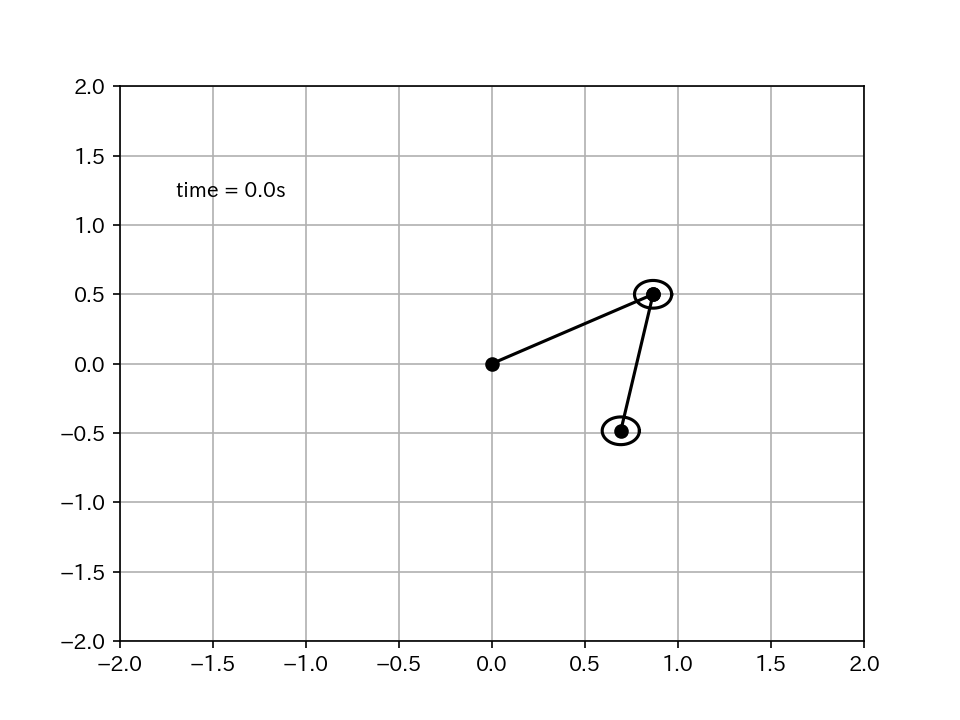

In [274]:
# 定式化のときと座標が違うので、少し面倒だ
fig,ax = plt.subplots()
i = 0

def update_fig(i):
    plt.cla()
    radius = 0.1

    # 棒1
    ax.plot([0,x1[i]],[0,-y1[i]],"o-k")
    # 玉1
    angle = np.arange(0,360)/180*np.pi #[rad]
    circle_x = radius*np.cos(angle)
    circle_y = radius*np.sin(angle)
    ax.plot(circle_x+x1[i], circle_y-y1[i], "-k")
    # 棒2
    ax.plot([x1[i],x2[i]],[-y1[i],-y2[i]],"o-k")
    # 玉2
    ax.plot(circle_x+x2[i], circle_y-y2[i], "-k")
    ax.axis = 'equal'
    ax.set_xlim(-2,2)
    ax.set_ylim(-2,2)
    ax.grid()
    
    ax.text(-1.7, 1.2,"time = %.1fs" % (i*dt))

update_fig(i)
plt.show()

In [275]:
%matplotlib notebook
fig, ax = plt.subplots()
anim = animation.FuncAnimation(fig, update_fig, frames=len(x1), interval=dt*1000)
plt.show()

<IPython.core.display.Javascript object>